## Park hashtag network community analysis

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import itertools
from networkx.algorithms import community
import numpy as np
import pandas as pd
import pickle

data = pd.read_csv('all_hashtags_combined.csv')
G = nx.read_gpickle("park_hashtag_network.gpickle")

with open('users_and_follower_count.pickle', 'rb') as file:
    users_and_fcount = pickle.load(file)

In [2]:
def quick_summary_of_subgraph(G, data):
    
    tweets = set() # indexes of all tweets that contributed to the creation of graph G
    for n, nbrs in G.adj.items():
        for nbr, eattr in nbrs.items():
            for tweet_ind in eattr['tweet_list']:
                tweets.add(tweet_ind)
                
    print("### TOP 10 MOST SIGNIFICANT EDGES BASED ON THE NUMBER OF TWEETS MENTIONING BOTH END NODES ###")
    sig_edges = sorted(G.edges(data='tweet_count'), key=(lambda x: x[2]), reverse=True)
    try:
        for i in range(10):
            print(sig_edges[i])
    except IndexError:
        pass
      
    #word_count = {}
    #for t in data.loc[list(tweets)].text:
    #    parts = t.split(' ')
    #    for p in parts:
    #        value = word_count.get(p, None)
    #        if value == None:
    #            word_count[p] = 1
    #        else:
    #            word_count[p] = value + 1
    #word_count_sorted =  sorted(word_count.items(), key=(lambda k: k[1]), reverse=True)            
    #print("\n### MOST FREQUENT WORDS IN TWEET TEXTS ###")
    #for w,v in word_count_sorted:
    #    if v > 2:
    #        print((w,v))
    #
    
    print("\n### TOP 10 TWEETS SORTED BY FAVORITE COUNT ###")
    display(data.loc[list(tweets)].sort_values('favorites', ascending=False).iloc[:10])
     
    print("\n### TOP 10 TWEETS SORTED BY RETWEET COUNT ###")
    display(data.loc[list(tweets)].sort_values('retweets', ascending=False).iloc[:10])
       
    print("\n### ALL USERS THAT HAVE CONTRIBUTED TO THE CREATION OF THIS HASHTAG SUBGRAPH, SORTED BY NUMBER OF TWEETS")
    most_tweets = data.loc[list(tweets)].groupby(['user_id','username']).count().sort_values('time', ascending=False)['time']
    most_tweets = pd.DataFrame({'id': most_tweets.index.get_level_values(0), 'name': most_tweets.index.get_level_values(1), 'number_of_tweets': most_tweets.values})
    most_tweets['follower_count'] = most_tweets['id'].apply(lambda x: users_and_fcount[x] if x in users_and_fcount.keys() else np.nan)
    most_tweets.drop(columns=['id'], inplace=True)
    display(most_tweets)
    

## Clique

In [3]:
cliqs = list(nx.find_cliques(G)) # All cliques
cliqs = sorted(cliqs, key=len, reverse=True) # Sort from largest to smallest

In [4]:
len(cliqs) # How many cliques found

556

In [ ]:
# Checking clique sizes from largest to smallest
for c in cliqs:
    print(len(c))

In [6]:
# Finding cliques, where the biggest tweet count edge attribute is over 100 tweets
big_cliqs = set()
for i, c in enumerate(cliqs):
    csub = G.subgraph(c)
    sig_edges = sorted(csub.edges(data='tweet_count'), key=(lambda x: x[2]), reverse=True)
    if sig_edges[0][2] > 50:
        big_cliqs.add(i)

In [ ]:
big_cliqs #indexes of big cliques

In [8]:
plt.rcParams['figure.figsize'] = (10, 10)

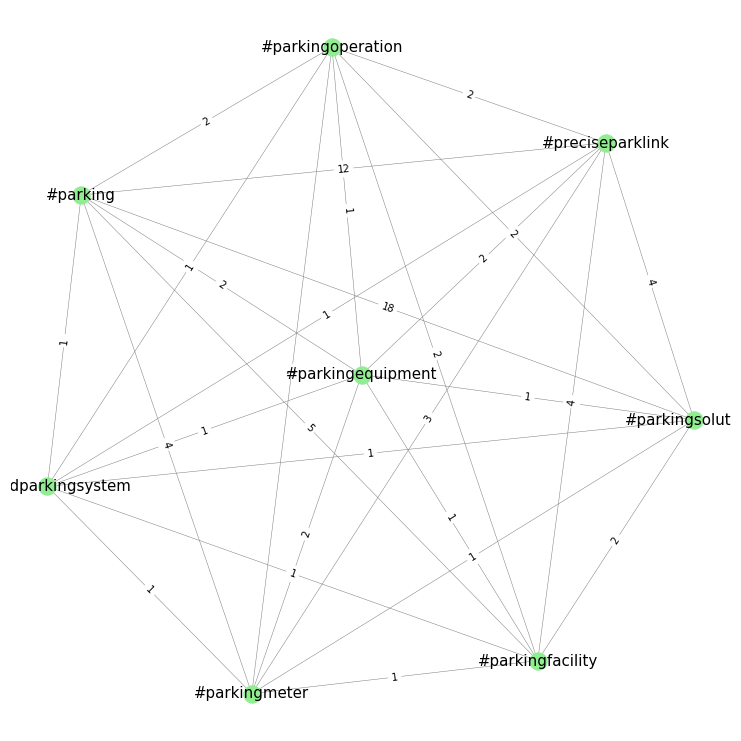

### TOP 10 MOST SIGNIFICANT EDGES BASED ON THE NUMBER OF TWEETS MENTIONING BOTH END NODES ###
('#parking', '#parkingsolutions', 18)
('#parking', '#preciseparklink', 12)
('#parking', '#parkingfacility', 5)
('#parking', '#parkingmeter', 4)
('#preciseparklink', '#parkingsolutions', 4)
('#preciseparklink', '#parkingfacility', 4)
('#preciseparklink', '#parkingmeter', 3)
('#parking', '#parkingequipment', 2)
('#parking', '#parkingoperation', 2)
('#preciseparklink', '#parkingequipment', 2)

### TOP 10 TWEETS SORTED BY FAVORITE COUNT ###


,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
820,2020-03-31 13:41:07,372897596,ParkAssist,scripps memorial hospital selected park assist...,2,3,#smartparking #parking #parkingnews #healthcar...,"new york, new york",372897596
4665,2020-02-19 16:24:01,372897596,ParkAssist,parking guidance system help gain control gara...,2,2,#parking #parkingsolutions,"new york, new york",372897596
7437,2020-01-23 13:55:45,372897596,ParkAssist,southpointe pavilions new parking garage getti...,2,2,#parkingnews #parkingsolutions #parking #smart...,"new york, new york",372897596
4236,2020-02-24 08:01:01,1339188552,Stable_Media1,read modern technology helping make hospital p...,0,1,#hospitaldesign #hospitalindustry #parking #pa...,london,1339188552
7768,2020-01-20 21:35:05,74511080,WestfaliaUSA,functional automated parking luxurious aesthe...,0,1,#parking #automatedparking #parkingsolutions,"york, pa",74511080
2986,2020-03-06 15:20:37,436710280,FurlaneGrant,new downtown crossing building could reach 21 ...,0,1,#parking #smartmobility #parkingsolutions,toronto,436710280
7750,2020-01-21 07:24:26,1214455094344859650,ParkHelp,parkhelp brasil park indigo brasil equipping 4...,0,1,#parkingsolutions #shoppingmall #shoppingcente...,"barcelona, spain",1214455094344859650
8960,2020-01-09 19:15:05,2203894291,PrecisePL,reliable parking equipment foundation successf...,0,0,#preciseparklink #urbanmobility #parking #park...,canada,2203894291
7644,2020-01-21 19:01:25,2203894291,PrecisePL,creates seamless parking experience precise pa...,0,0,#preciseparklink #urbanmobility #cityoflethbri...,canada,2203894291
6364,2020-02-03 16:32:48,2203894291,PrecisePL,learn seamlessly transitioned singlespace mult...,0,0,#preciseparklink #urbanmobility #cityofsaskato...,canada,2203894291



### TOP 10 TWEETS SORTED BY RETWEET COUNT ###


,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
4665,2020-02-19 16:24:01,372897596,ParkAssist,parking guidance system help gain control gara...,2,2,#parking #parkingsolutions,"new york, new york",372897596
7437,2020-01-23 13:55:45,372897596,ParkAssist,southpointe pavilions new parking garage getti...,2,2,#parkingnews #parkingsolutions #parking #smart...,"new york, new york",372897596
820,2020-03-31 13:41:07,372897596,ParkAssist,scripps memorial hospital selected park assist...,2,3,#smartparking #parking #parkingnews #healthcar...,"new york, new york",372897596
6088,2020-02-05 21:11:13,436710280,FurlaneGrant,sneak preview series starts today updated foll...,1,0,#technology #parking #parkingsolutions #cloud ...,toronto,436710280
8390,2020-01-15 13:01:47,2203894291,PrecisePL,partnered parking supplier protects organizati...,1,0,#preciseparklink #urbanmobility #parking #park...,canada,2203894291
2353,2020-03-12 20:00:58,2203894291,PrecisePL,finding future cuttingedge technologies artifi...,1,0,#preciseparklink #urbanmobility #parking #ai #...,canada,2203894291
8068,2020-01-17 17:30:00,2203894291,PrecisePL,witness magnitude daytoday s glimpse happens b...,1,0,#preciseparklink #urbanmobility #parking #park...,canada,2203894291
8960,2020-01-09 19:15:05,2203894291,PrecisePL,reliable parking equipment foundation successf...,0,0,#preciseparklink #urbanmobility #parking #park...,canada,2203894291
7644,2020-01-21 19:01:25,2203894291,PrecisePL,creates seamless parking experience precise pa...,0,0,#preciseparklink #urbanmobility #cityoflethbri...,canada,2203894291
6364,2020-02-03 16:32:48,2203894291,PrecisePL,learn seamlessly transitioned singlespace mult...,0,0,#preciseparklink #urbanmobility #cityofsaskato...,canada,2203894291



### ALL USERS THAT HAVE CONTRIBUTED TO THE CREATION OF THIS HASHTAG SUBGRAPH, SORTED BY NUMBER OF TWEETS


,name,number_of_tweets,follower_count
0,PrecisePL,12,1614
1,ParkAssist,4,940
2,FurlaneGrant,2,291
3,NobleParking,2,15
4,ParkHelp,2,20
5,WestfaliaUSA,1,758
6,GTECHNAinc,1,448
7,BritishParking,1,3538
8,Stable_Media1,1,272
9,OnCallParking,1,22


In [9]:
# This is just some manual checking of different communities...

# 5 = parking solutions
# 16 = truckparking, also num. 30
# 18 = parking technology, also num. 19 is parkingtoday advertising for parking tech
# 27 = getparkplus advertising
# 32 = airportparking
# 33 = a small community of parking for homeless
# ['#parking', '#airportparking', '#book2park', '#parkinglocation']
# ['#parking', '#rearparking', '#parkingsensors']
# 40 = future of parking
clique_graph = G.subgraph(cliqs[5])
pos = nx.spring_layout(clique_graph)
nx.draw(clique_graph, pos, with_labels=True, font_size=15, width=0.5, node_color='lightgreen', edge_color='grey')
nx.draw_networkx_edge_labels(clique_graph, pos, edge_labels=nx.get_edge_attributes(clique_graph, name='tweet_count'), 
                             font_size=10,label_pos = 0.5)
plt.show()
quick_summary_of_subgraph(clique_graph, data)

In [10]:
# The following commented out codes are also some manual checking, taking out to reduce size of return...

In [11]:
#clique1_graph = G.subgraph(cliqs[0])
#nx.draw(clique1_graph, with_labels=True, width=0.5, node_color='lightgreen', edge_color='grey')
#plt.savefig("largest_clique.png")
#plt.show()
#quick_summary_of_subgraph(clique1_graph, data)

In [12]:
#clique9_graph = G.subgraph(cliqs[8])
#nx.draw(clique9_graph, with_labels=True, width=0.5, node_color='lightgreen', edge_color='grey')
#plt.show()
#quick_summary_of_subgraph(clique9_graph, data)

In [13]:
#clique3_graph = G.subgraph(cliqs[2])
#nx.draw(clique3_graph, with_labels=True, width=0.5, node_color='lightgreen', edge_color='grey')
#plt.savefig("third_largest_clique.png")
#plt.show()
#quick_summary_of_subgraph(clique3_graph, data)

In [14]:
#clique4_graph = G.subgraph(cliqs[3])
#nx.draw(clique4_graph, with_labels=True, width=0.5, node_color='lightgreen', edge_color='grey')
#plt.savefig("third_largest_clique.png")
#plt.show()
#quick_summary_of_subgraph(clique4_graph, data)

In [15]:
#clique7_graph = G.subgraph(cliqs[6])
#nx.draw(clique7_graph, with_labels=True, width=0.5, node_color='lightgreen', edge_color='grey')
#plt.savefig("third_largest_clique.png")
#plt.show()
#quick_summary_of_subgraph(clique7_graph, data)

In [16]:
#clique13_graph = G.subgraph(cliqs[12])
#nx.draw(clique13_graph, with_labels=True, width=0.5, node_color='lightgreen', edge_color='grey')
#plt.savefig("third_largest_clique.png")
#plt.show()
#quick_summary_of_subgraph(clique13_graph, data)

In [17]:
#clique14_graph = G.subgraph(cliqs[13])
#nx.draw(clique14_graph, with_labels=True, width=0.5, node_color='lightgreen', edge_color='grey')
#plt.savefig("third_largest_clique.png")
#plt.show()
#quick_summary_of_subgraph(clique14_graph, data)

In [18]:
#clique15_graph = G.subgraph(cliqs[14])
#nx.draw(clique15_graph, with_labels=True, width=0.5, node_color='lightgreen', edge_color='grey')
#plt.savefig("third_largest_clique.png")
#plt.show()
#quick_summary_of_subgraph(clique15_graph, data)

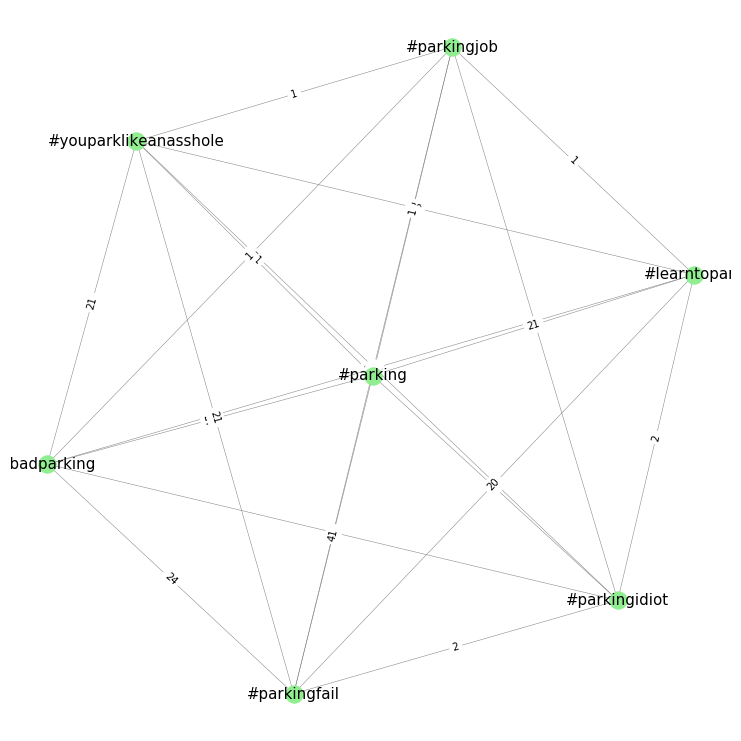

### TOP 10 MOST SIGNIFICANT EDGES BASED ON THE NUMBER OF TWEETS MENTIONING BOTH END NODES ###
('#parking', '#badparking', 50)
('#parking', '#parkingfail', 41)
('#badparking', '#parkingfail', 24)
('#learntopark', '#parking', 21)
('#parking', '#youparklikeanasshole', 21)
('#youparklikeanasshole', '#badparking', 21)
('#youparklikeanasshole', '#parkingfail', 21)
('#learntopark', '#badparking', 20)
('#learntopark', '#parkingfail', 20)
('#learntopark', '#youparklikeanasshole', 20)

### TOP 10 TWEETS SORTED BY FAVORITE COUNT ###


,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
2308,2020-03-13 11:59:29,20062352,simonwoodward,knew symptom complete lack consideration other...,5,6,#covid19 #coronavirus #parking #dickhead #ypla...,coventry,20062352
4297,2020-02-23 11:26:24,1032890570174341120,HighlandParking,pcn issued fort william please aware single do...,5,5,#lochaber #badparking #parking #highland,"inverness, scotland",1032890570174341120
10091,2020-02-10 15:17:27,1116977137,YinzCantPark,parking spots taken really late work submi...,1,5,#jagoff #pittsburgh #badparking #parkinglot #p...,"pittsburgh, pa",1116977137
8614,2020-01-13 13:40:54,416619031,JSKColwill,rescued garage exactly graceful,0,3,#parkingfail #parking,"yeovil, england",416619031
1588,2020-03-21 10:36:22,2956596729,BrewBearUK,empty car park so chap parks road bend words...,2,3,#parking #badparking #kempston #bedford,"bedford, uk",2956596729
3883,2020-02-27 08:30:39,1192168371455967238,210dab,hate happens,0,2,#fiat #fiat500 #parking #parkingfail,"reading, england",1192168371455967238
8481,2020-01-14 16:51:58,4220240847,AccessiblParkin,costco,0,2,#idiotparker #parkingfail #parking,world wide,4220240847
6454,2020-02-02 20:45:09,1109971796227510273,ukexceptaccess,im totally fine parking right,1,2,#trucker #truckdriver #parking #parkingfail,"kendal, england",1109971796227510273
404,2020-04-06 14:16:51,101815612,MyBeckersStory,dear car enthusiasts empty space equal opportu...,1,2,#accessibleparking #parkingfails #parking #par...,NaN,101815612
6822,2020-01-29 19:59:21,1339566026,HodgesMohrSHPK,literally laughed loud read one,1,1,#wednesdayfun #itstrue #truth #tryagain #parki...,"sherwood park, alberta",1339566026



### TOP 10 TWEETS SORTED BY RETWEET COUNT ###


,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
2308,2020-03-13 11:59:29,20062352,simonwoodward,knew symptom complete lack consideration other...,5,6,#covid19 #coronavirus #parking #dickhead #ypla...,coventry,20062352
4297,2020-02-23 11:26:24,1032890570174341120,HighlandParking,pcn issued fort william please aware single do...,5,5,#lochaber #badparking #parking #highland,"inverness, scotland",1032890570174341120
1588,2020-03-21 10:36:22,2956596729,BrewBearUK,empty car park so chap parks road bend words...,2,3,#parking #badparking #kempston #bedford,"bedford, uk",2956596729
5965,2020-02-06 18:32:35,3057255892,YPLAAH,nope visiting europe,1,0,#yplaah #youparklikeanasshole #badparking #par...,everywhere!,3057255892
6379,2020-02-03 14:50:47,3057255892,YPLAAH,ford chevy s bigger douche,1,0,#yplaah #youparklikeanasshole #badparking #par...,everywhere!,3057255892
6822,2020-01-29 19:59:21,1339566026,HodgesMohrSHPK,literally laughed loud read one,1,1,#wednesdayfun #itstrue #truth #tryagain #parki...,"sherwood park, alberta",1339566026
8488,2020-01-14 16:05:19,101815612,MyBeckersStory,guess ca nt find accessible parking space crea...,1,1,#parkingfail #accessibleparking #parking #pont...,NaN,101815612
10091,2020-02-10 15:17:27,1116977137,YinzCantPark,parking spots taken really late work submi...,1,5,#jagoff #pittsburgh #badparking #parkinglot #p...,"pittsburgh, pa",1116977137
404,2020-04-06 14:16:51,101815612,MyBeckersStory,dear car enthusiasts empty space equal opportu...,1,2,#accessibleparking #parkingfails #parking #par...,NaN,101815612
6454,2020-02-02 20:45:09,1109971796227510273,ukexceptaccess,im totally fine parking right,1,2,#trucker #truckdriver #parking #parkingfail,"kendal, england",1109971796227510273



### ALL USERS THAT HAVE CONTRIBUTED TO THE CREATION OF THIS HASHTAG SUBGRAPH, SORTED BY NUMBER OF TWEETS


,name,number_of_tweets,follower_count
0,YPLAAH,19,47
1,PSRltd,12,663
2,DANOSOVIC,3,97
3,TrollTheSavage,2,1
4,MyBeckersStory,2,1894
5,AccessiblParkin,1,239
6,tomcatGB,1,15
7,Echowitch,1,3
8,BrewBearUK,1,759
9,eTagsTweets,1,1271


In [19]:
cliquebash_graph = G.subgraph(['#parking',
   '#parkingjob',
   '#parkingfail',
   '#parkingidiot',
   '#learntopark',
   '#youparklikeanasshole',
   '#badparking'])
pos = nx.spring_layout(cliquebash_graph)
nx.draw(cliquebash_graph, pos, with_labels=True, font_size=15, width=0.5, node_color='lightgreen', edge_color='grey')
nx.draw_networkx_edge_labels(cliquebash_graph, pos, edge_labels=nx.get_edge_attributes(cliquebash_graph, name='tweet_count'), 
                             font_size=10,label_pos = 0.5)
plt.savefig("park_hashtag_clique.png")
plt.show()
quick_summary_of_subgraph(cliquebash_graph, data)

In [20]:
num_of_cliqs_for_each_node = nx.number_of_cliques(G)

In [ ]:
# Showing in how many cliques each node is present
sorted(num_of_cliqs_for_each_node.items(), key=(lambda k: k[1]), reverse=True)

In [22]:
# this was used to manually find cliques that have the node of interest in them
nx.cliques_containing_node(G, ['#findparking'])

{'#findparking': [['#parking', '#parkwheels', '#findparking']]}

## k-plex

In [23]:
#from kplex_github import * # importing the needed k-plex code, that was found from github 

In [24]:
# Because this was a smaller nerwork, also k value of 3 was tried, but the output of algorithm was very large. 
# Communities were checked also for k value of 3, but that did not bring anything new
#k = 2
#kplexes2, kplexes2Max = kplexAlg(G, k)

#with open('2_plexexMax_park_hashtag.pickle', 'wb') as file:
#    pickle.dump(kplexes2Max, file)

In [25]:
with open('2_plexexMax_park_hashtag.pickle', 'rb') as file:
    kplexes2Max = pickle.load(file)

In [26]:
plexes2sorted = sorted(kplexes2Max, key=(lambda x: len(x)), reverse=True)

In [ ]:
plexes2sorted # Observing

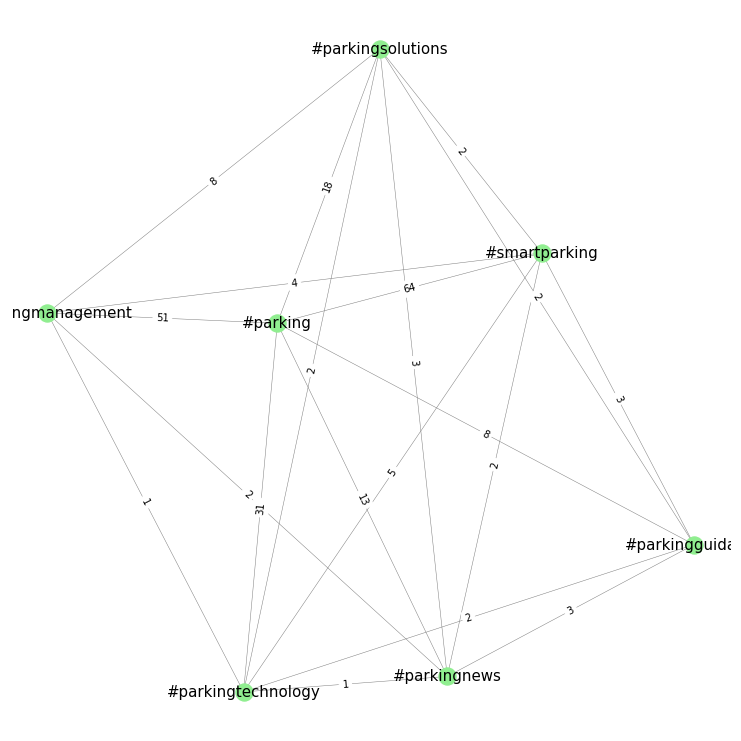

### TOP 10 MOST SIGNIFICANT EDGES BASED ON THE NUMBER OF TWEETS MENTIONING BOTH END NODES ###
('#parking', '#smartparking', 64)
('#parking', '#parkingmanagement', 51)
('#parking', '#parkingtechnology', 31)
('#parking', '#parkingsolutions', 18)
('#parking', '#parkingnews', 13)
('#parking', '#parkingguidance', 8)
('#parkingsolutions', '#parkingmanagement', 8)
('#parkingtechnology', '#smartparking', 5)
('#parkingmanagement', '#smartparking', 4)
('#parkingnews', '#parkingsolutions', 3)

### TOP 10 TWEETS SORTED BY FAVORITE COUNT ###


,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
9351,2020-01-06 07:04:30,1061310051229593600,NorthDmc,spring post fixing thermoplastic road marking ...,5,11,#pedestrainisation #parking #parkingmanagement...,delhi,1061310051229593600
9352,2020-01-06 06:58:46,1061310051229593600,NorthDmc,pedestrianisation parking management work way ...,5,7,#pedestrainisation #parking #parkingmanagement...,delhi,1061310051229593600
8224,2020-01-16 14:37:54,1179510571294760961,REEFPARKING,one first parking locations opened legacy bran...,0,5,#tbt #parking #parkingmanagement,NaN,1179510571294760961
1855,2020-03-18 13:39:34,372897596,ParkAssist,park assist changing parking game cache creek ...,2,5,#parking #casinos #parkingguidance #parkingnews,"new york, new york",372897596
5485,2020-02-11 15:51:20,2250434100,Bosch_BCDS,conversations among experts full swing let us...,2,5,#eworld2020 #bosch #iot #boschpls #parking #pa...,"reutlingen, baden-württemberg",2250434100
5932,2020-02-07 06:37:49,2537485591,ParkingRhino,celebration time parkingrhino crossed 5 millio...,2,4,#parkingtickets #parkingdata #smartparking #pa...,bangalore,2537485591
6270,2020-02-04 13:19:01,981862393855623169,wisdomplexus,backed technology redefining parking experience,2,4,#ai #parking #smartparking #artificialintellig...,"pune, india",981862393855623169
8636,2020-01-13 11:09:49,724536250657447940,getmyparking,urban areas today put mildly headache re hunt ...,1,4,#parking #smartparking #apps,"new delhi, india",724536250657447940
1355,2020-03-24 16:30:26,516420720,QFreeASA,visitors victorian square sparks nevada benefi...,1,3,#wayfinding #parking #parkingguidance #qfreeits,worldwide,516420720
1936,2020-03-17 18:36:44,76926140,parkingtoday,m4 system changing parking game cache creek ...,2,3,#parking #parkingcameras #parkingtechnology #m...,"los angeles, ca usa",76926140



### TOP 10 TWEETS SORTED BY RETWEET COUNT ###


,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
9352,2020-01-06 06:58:46,1061310051229593600,NorthDmc,pedestrianisation parking management work way ...,5,7,#pedestrainisation #parking #parkingmanagement...,delhi,1061310051229593600
9351,2020-01-06 07:04:30,1061310051229593600,NorthDmc,spring post fixing thermoplastic road marking ...,5,11,#pedestrainisation #parking #parkingmanagement...,delhi,1061310051229593600
6437,2020-02-03 05:50:00,1084940572375212033,SmartTrafficSys,delighted announce finished 3rd project kogara...,3,3,#smartparking #parking,"sydney, new south wales",1084940572375212033
7437,2020-01-23 13:55:45,372897596,ParkAssist,southpointe pavilions new parking garage getti...,2,2,#parkingnews #parkingsolutions #parking #smart...,"new york, new york",372897596
856,2020-03-30 20:24:29,76926140,parkingtoday,scripps memorial hospital selects provide pat...,2,2,#parking #parkingexperience #mobility #parking...,"los angeles, ca usa",76926140
1717,2020-03-19 17:31:52,76926140,parkingtoday,parknews together message,2,3,#parking #mobility #technology #smartparking #...,"los angeles, ca usa",76926140
4665,2020-02-19 16:24:01,372897596,ParkAssist,parking guidance system help gain control gara...,2,2,#parking #parkingsolutions,"new york, new york",372897596
1936,2020-03-17 18:36:44,76926140,parkingtoday,m4 system changing parking game cache creek ...,2,3,#parking #parkingcameras #parkingtechnology #m...,"los angeles, ca usa",76926140
1855,2020-03-18 13:39:34,372897596,ParkAssist,park assist changing parking game cache creek ...,2,5,#parking #casinos #parkingguidance #parkingnews,"new york, new york",372897596
5741,2020-02-09 12:11:12,27008603,sbamueller,blog reviewed sensor setup installation good p...,2,1,#parking #bosch #ttn #smartcity #iot #smartpar...,freiburg,27008603



### ALL USERS THAT HAVE CONTRIBUTED TO THE CREATION OF THIS HASHTAG SUBGRAPH, SORTED BY NUMBER OF TWEETS


,name,number_of_tweets,follower_count
0,parkingtoday,32,2679
1,getparkplus,16,1216
2,cleverciti,9,395
3,ParkPCA,6,225
4,ParkAssist,5,940
5,FurlaneGrant,4,291
6,FeigElectronics,4,308
7,PrecisePL,4,1614
8,CassParking,4,19
9,seetyco,4,238


In [28]:
# Several plexes were observed, but only one left to reduce size of return:
plex_graph = G.subgraph(['#parking',
  '#parkingguidance',
  '#parkingmanagement',
  '#parkingnews',
  '#parkingsolutions',
  '#parkingtechnology',
  '#smartparking'])
pos = nx.spring_layout(plex_graph)
nx.draw(plex_graph, pos, with_labels=True, font_size=15, width=0.5, node_color='lightgreen', edge_color='grey')
nx.draw_networkx_edge_labels(plex_graph, pos, edge_labels=nx.get_edge_attributes(plex_graph, name='tweet_count'), 
                             font_size=10,label_pos = 0.5)
plt.savefig("2plex_park_hashtag_network.png")
plt.show()
quick_summary_of_subgraph(plex_graph, data)

In [29]:
min(plex_graph.degree(), key=(lambda k: k[1]))[1] # Checking the lowest degree in the graph

5

## k-core

In [30]:
k_core_graph = nx.k_core(G, k = 9) # The second biggest k-core, biggest was basically same as largest clique

In [31]:
min(k_core_graph.degree(), key=(lambda k: k[1]))[1] # Checking the value of k

9

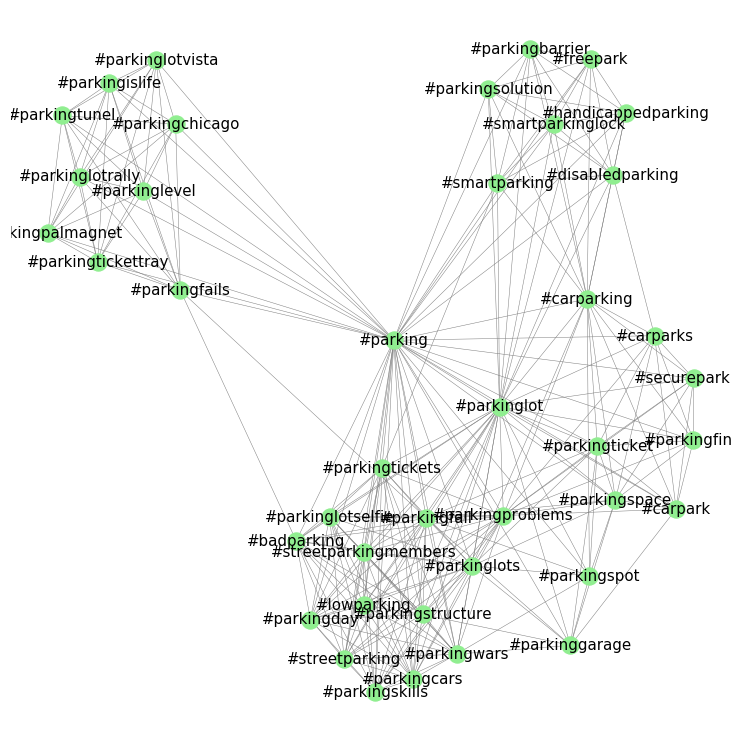

In [32]:
nx.draw(k_core_graph, with_labels=True, font_size=15, width=0.5, node_color='lightgreen', edge_color='grey')
plt.savefig('16core_hashtag_network.png')

In [33]:
quick_summary_of_subgraph(k_core_graph, data)

### TOP 10 MOST SIGNIFICANT EDGES BASED ON THE NUMBER OF TWEETS MENTIONING BOTH END NODES ###
('#parking', '#carparking', 74)
('#carpark', '#parking', 69)
('#smartparking', '#parking', 64)
('#parking', '#badparking', 50)
('#parking', '#parkinglot', 48)
('#parking', '#parkingfail', 41)
('#parking', '#parkingspot', 35)
('#badparking', '#parkingfail', 24)
('#carpark', '#parkinglot', 23)
('#parkingticket', '#parking', 17)

### TOP 10 TWEETS SORTED BY FAVORITE COUNT ###


,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
10271,2020-01-17 19:11:00,347388688,Sarah_Clayton81,sun setting workweek sunset suduction waiti...,18,364,#sunset #urbanboudoir #parkinggarage #parkingl...,"pennsylvania, usa",347388688
4504,2020-02-21 00:07:28,1179141915893276677,howzmeluck,ballsed feck park bridge one see,34,180,#dashcam #fail #oops #driver #parking #parking...,somewhere over the rainbow,1179141915893276677
1228,2020-03-25 20:27:08,1179141915893276677,howzmeluck,fecking right,60,177,#staysafestayhome #stayathome #stayathome #sel...,somewhere over the rainbow,1179141915893276677
4637,2020-02-19 19:09:15,4769892366,LoulouHoltz,parking ticket got fine written want thank sw...,15,128,#parking #parkingticket #mercedes #pickuplines,"california, usa",4769892366
2696,2020-03-10 00:24:33,1179141915893276677,howzmeluck,traffic wardens relentless matter world grrrrr,17,115,#trafficofficers #trafficwarden #relentless #c...,somewhere over the rainbow,1179141915893276677
9885,2020-03-11 23:05:11,21642087,SolarRoadways,solar roadways parking lots green intelligent ...,4,23,#solarroadways #parkinglot #smartparking #smar...,"sagle, idaho",21642087
1472,2020-03-23 11:54:50,164997945,jround999,hi could think facilitate times workers get wo...,17,15,#parking #tooting #covid #nhs #carpark #retweeet,"east dulwich, london, uk",164997945
8943,2020-01-09 23:40:21,1179141915893276677,howzmeluck,careful folks local councils training new bree...,5,13,#parking #carpark #trafficwarden #enforcement ...,somewhere over the rainbow,1179141915893276677
6703,2020-01-30 17:28:10,110766467,BioMicrobics,info 1 rain 1 parking spot 320ft2 100 gallons...,5,12,#sewerbowl #stormwater #kansascity #rain #park...,"lenexa, kansas usa",110766467
4229,2020-02-24 09:57:17,583759428,cjwiseman72,selfish idiot alert,2,9,#idiots #selfish #disabled #parking #disabilit...,dorset uk,583759428



### TOP 10 TWEETS SORTED BY RETWEET COUNT ###


,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
1228,2020-03-25 20:27:08,1179141915893276677,howzmeluck,fecking right,60,177,#staysafestayhome #stayathome #stayathome #sel...,somewhere over the rainbow,1179141915893276677
4504,2020-02-21 00:07:28,1179141915893276677,howzmeluck,ballsed feck park bridge one see,34,180,#dashcam #fail #oops #driver #parking #parking...,somewhere over the rainbow,1179141915893276677
10271,2020-01-17 19:11:00,347388688,Sarah_Clayton81,sun setting workweek sunset suduction waiti...,18,364,#sunset #urbanboudoir #parkinggarage #parkingl...,"pennsylvania, usa",347388688
2696,2020-03-10 00:24:33,1179141915893276677,howzmeluck,traffic wardens relentless matter world grrrrr,17,115,#trafficofficers #trafficwarden #relentless #c...,somewhere over the rainbow,1179141915893276677
1472,2020-03-23 11:54:50,164997945,jround999,hi could think facilitate times workers get wo...,17,15,#parking #tooting #covid #nhs #carpark #retweeet,"east dulwich, london, uk",164997945
4637,2020-02-19 19:09:15,4769892366,LoulouHoltz,parking ticket got fine written want thank sw...,15,128,#parking #parkingticket #mercedes #pickuplines,"california, usa",4769892366
2869,2020-03-07 17:49:07,1512794462,Ryan_TheGarage,see easily happen wondered left note,7,0,#sheffield #sheffieldissuper #rotherhamiswonde...,sheffield,1512794462
8943,2020-01-09 23:40:21,1179141915893276677,howzmeluck,careful folks local councils training new bree...,5,13,#parking #carpark #trafficwarden #enforcement ...,somewhere over the rainbow,1179141915893276677
4297,2020-02-23 11:26:24,1032890570174341120,HighlandParking,pcn issued fort william please aware single do...,5,5,#lochaber #badparking #parking #highland,"inverness, scotland",1032890570174341120
2308,2020-03-13 11:59:29,20062352,simonwoodward,knew symptom complete lack consideration other...,5,6,#covid19 #coronavirus #parking #dickhead #ypla...,coventry,20062352



### ALL USERS THAT HAVE CONTRIBUTED TO THE CREATION OF THIS HASHTAG SUBGRAPH, SORTED BY NUMBER OF TWEETS


,name,number_of_tweets,follower_count
0,ridingscentre,22,4680
1,YPLAAH,19,47
2,RCPParking,18,1065
3,jonestowne,16,8764
4,PSRltd,12,663
5,cleverciti,9,395
6,parkingtoday,9,2679
7,ParkingNexus,9,38
8,cemplas,8,487
9,NWJS_jobs,7,30


## Girvan-Newman

In [34]:
# Takes very long time to run
#communities = list(community.girvan_newman(G))

In [35]:
#with open('park_girvan_newman_communities.pickle', 'wb') as file:
#    pickle.dump(communities, file)

In [36]:
with open('park_girvan_newman_communities.pickle', 'rb') as file:
    communities = pickle.load(file)

In [37]:
# Checking the sizes of communities in the first 20 levels of algorithm
import itertools
for coms in itertools.islice(communities, 20):
    tup = tuple(sorted(c) for c in coms)
    for t in tup:
        print(len(t), end = ' ')
    print()

659 5 
630 29 5 
518 29 112 5 
437 29 112 81 5 
429 29 112 81 8 5 
424 29 112 81 5 8 5 
419 29 112 5 81 5 8 5 
415 29 112 5 81 5 8 4 5 
400 29 112 5 15 81 5 8 4 5 
396 29 112 5 15 81 5 8 4 5 4 
389 29 112 7 5 15 81 5 8 4 5 4 
382 29 112 7 5 15 81 5 8 7 4 5 4 
379 29 112 7 5 15 81 5 8 7 4 3 5 4 
375 29 112 7 5 15 81 5 8 7 4 3 5 4 4 
371 29 112 7 5 15 81 5 8 7 4 3 5 4 4 4 
367 29 112 7 5 15 81 5 8 7 4 3 5 4 4 4 4 
353 29 112 7 5 15 81 5 8 7 4 14 3 5 4 4 4 4 
347 29 112 7 5 15 81 5 8 7 4 14 3 5 4 4 6 4 4 
343 29 112 7 5 15 81 4 5 8 7 4 14 3 5 4 4 6 4 4 
333 29 112 7 5 15 81 4 5 8 7 4 14 3 10 5 4 4 6 4 4 


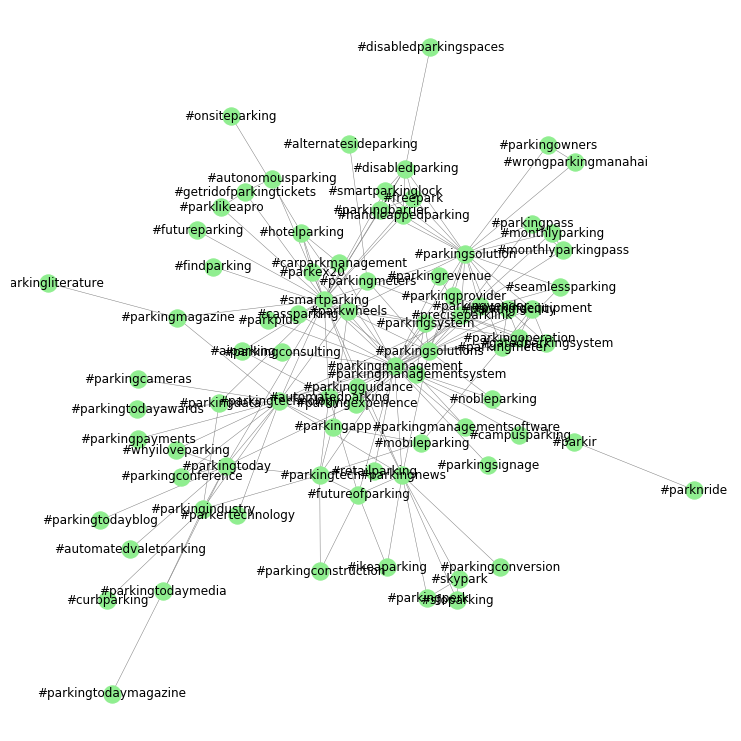

### TOP 10 MOST SIGNIFICANT EDGES BASED ON THE NUMBER OF TWEETS MENTIONING BOTH END NODES ###
('#parkingmanagement', '#parkingsolutions', 8)
('#parkingtoday', '#parkingtechnology', 7)
('#parkingsolution', '#preciseparklink', 6)
('#parkwheels', '#parkingapp', 5)
('#parkingtechnology', '#smartparking', 5)
('#parkingmanagement', '#smartparking', 4)
('#parkingmanagement', '#hotelparking', 4)
('#parkingtoday', '#smartparking', 4)
('#parkingtoday', '#parkingindustry', 4)
('#smartparking', '#getridofparkingtickets', 4)

### TOP 10 TWEETS SORTED BY FAVORITE COUNT ###


,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
1855,2020-03-18 13:39:34,372897596,ParkAssist,park assist changing parking game cache creek ...,2,5,#parking #casinos #parkingguidance #parkingnews,"new york, new york",372897596
5485,2020-02-11 15:51:20,2250434100,Bosch_BCDS,conversations among experts full swing let us...,2,5,#eworld2020 #bosch #iot #boschpls #parking #pa...,"reutlingen, baden-württemberg",2250434100
6270,2020-02-04 13:19:01,981862393855623169,wisdomplexus,backed technology redefining parking experience,2,4,#ai #parking #smartparking #artificialintellig...,"pune, india",981862393855623169
5932,2020-02-07 06:37:49,2537485591,ParkingRhino,celebration time parkingrhino crossed 5 millio...,2,4,#parkingtickets #parkingdata #smartparking #pa...,bangalore,2537485591
4429,2020-02-21 16:23:00,1911222384,FeigElectronics,amp contactless identification solution deploy...,0,3,#ucodedna #rfid #security #parking #smartcity ...,"atlanta, georgia",1911222384
1717,2020-03-19 17:31:52,76926140,parkingtoday,parknews together message,2,3,#parking #mobility #technology #smartparking #...,"los angeles, ca usa",76926140
6077,2020-02-06 02:50:53,2827385548,OfficialTBSBTS,c promotion valid season pass holders receipt ...,1,3,#terminalbersepaduselatan #terminaltbs #parknr...,3°04'40.8n 101°42'39.6e,2827385548
1936,2020-03-17 18:36:44,76926140,parkingtoday,m4 system changing parking game cache creek ...,2,3,#parking #parkingcameras #parkingtechnology #m...,"los angeles, ca usa",76926140
3838,2020-02-27 14:07:35,1013017360096100352,Prkwhls,nt cruise parking anymore download parkwheels ...,0,3,#parkwheels #parking #parkingapp,NaN,1013017360096100352
376,2020-04-06 18:43:29,21655695,jvhpt,know parking today media leading publication s...,2,3,#parking #parkingindustry #parkingtoday #mobility,"los angeles, california",21655695



### TOP 10 TWEETS SORTED BY RETWEET COUNT ###


,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
6270,2020-02-04 13:19:01,981862393855623169,wisdomplexus,backed technology redefining parking experience,2,4,#ai #parking #smartparking #artificialintellig...,"pune, india",981862393855623169
1855,2020-03-18 13:39:34,372897596,ParkAssist,park assist changing parking game cache creek ...,2,5,#parking #casinos #parkingguidance #parkingnews,"new york, new york",372897596
1936,2020-03-17 18:36:44,76926140,parkingtoday,m4 system changing parking game cache creek ...,2,3,#parking #parkingcameras #parkingtechnology #m...,"los angeles, ca usa",76926140
820,2020-03-31 13:41:07,372897596,ParkAssist,scripps memorial hospital selected park assist...,2,3,#smartparking #parking #parkingnews #healthcar...,"new york, new york",372897596
1717,2020-03-19 17:31:52,76926140,parkingtoday,parknews together message,2,3,#parking #mobility #technology #smartparking #...,"los angeles, ca usa",76926140
7437,2020-01-23 13:55:45,372897596,ParkAssist,southpointe pavilions new parking garage getti...,2,2,#parkingnews #parkingsolutions #parking #smart...,"new york, new york",372897596
6792,2020-01-30 03:58:16,2827385548,OfficialTBSBTS,free 1 bottle tbs mineral water parking fee rm...,2,3,#terminalbersepaduselatan #terminaltbs #parknr...,3°04'40.8n 101°42'39.6e,2827385548
376,2020-04-06 18:43:29,21655695,jvhpt,know parking today media leading publication s...,2,3,#parking #parkingindustry #parkingtoday #mobility,"los angeles, california",21655695
856,2020-03-30 20:24:29,76926140,parkingtoday,scripps memorial hospital selects provide pat...,2,2,#parking #parkingexperience #mobility #parking...,"los angeles, ca usa",76926140
5932,2020-02-07 06:37:49,2537485591,ParkingRhino,celebration time parkingrhino crossed 5 millio...,2,4,#parkingtickets #parkingdata #smartparking #pa...,bangalore,2537485591



### ALL USERS THAT HAVE CONTRIBUTED TO THE CREATION OF THIS HASHTAG SUBGRAPH, SORTED BY NUMBER OF TWEETS


,name,number_of_tweets,follower_count
0,parkingtoday,29,2679
1,getparkplus,14,1216
2,PrecisePL,11,1614
3,Prkwhls,10,182
4,seetyco,4,238
5,ParkAssist,4,940
6,jvhpt,3,1613
7,OfficialTBSBTS,3,1719
8,CassParking,3,19
9,ParkPCA,3,225


In [38]:
# Several analyzed
split_graph = G.subgraph(communities[3][3])
nx.draw(split_graph, with_labels=True, width=0.5, node_color='lightgreen', edge_color='grey')
plt.savefig("girvan_park_hashtag.png")
plt.show()
quick_summary_of_subgraph(split_graph, data)

In [ ]:
# checking the degrees of the nodes belonging to the upper graph
sorted(G.degree(split_graph), key=(lambda k: k[1]), reverse=True) 

In [41]:
#gn1 = communities[3][0]
#gn2 = communities[3][1]
#gn3 = communities[3][2]
#gn4 = communities[3][3]
#gn5 = communities[3][4]
#gn6 = communities[4][4]

#gn_graph = G.subgraph(gn1)
#nx.draw(gn_graph, with_labels=True, width=0.5, node_color='lightgreen', edge_color='grey')
#plt.show()
#quick_summary_of_subgraph(gn_graph, data)